In [1]:
import pandas as pd
from descriptor_gen import DescriptorGen
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.features import Manifold
from tqdm import tqdm
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

Enable Pandas progress_apply

In [2]:
tqdm.pandas()

Read the input SMILES file

In [3]:
df = pd.read_csv("cluster_test.smi",sep=" ",names=["SMILES","Name"])

Generate molecular descriptors

In [4]:
dg = DescriptorGen()
df['desc'] = df.SMILES.progress_apply(dg.from_smiles)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 735/735 [00:00<00:00, 775.32it/s]


Create an X value from the descriptors

In [5]:
X = np.stack(df.desc)

Clustering with k-means only requires a few lines of code

In [6]:
sns.set()
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
km.fit(X)
cluster_list = km.predict(X)

Plot the cluster populations

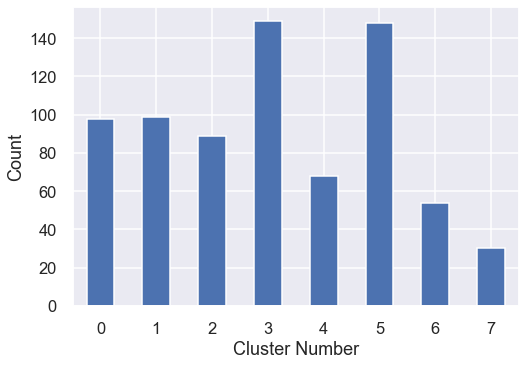

In [7]:
sns.set_context('talk')
ax = pd.Series(cluster_list).value_counts().sort_index().plot(kind="bar")
ax.set_xlabel("Cluster Number")
ax.set_ylabel("Count")
ax.tick_params(axis='x', rotation=0)

Add the cluster id to the the dataframe and save the dataframe to a csv file

In [8]:
df['Cluster'] = cluster_list
df[['SMILES','Name','Cluster']].to_csv("clusters.csv")

One potential drawback of k-means clustering is that it requires you to specify the number of clusters.  One means of determining the optimal number of clusters is by minimizing the silhouette score. 

Silhouette Score =  $\frac{(a-b)}{max(a,b)}$ where **a** is the average intracluster distance and **b** is the average intercluster distance.

Investigate the relationship between the number of clusters and the silhouette score

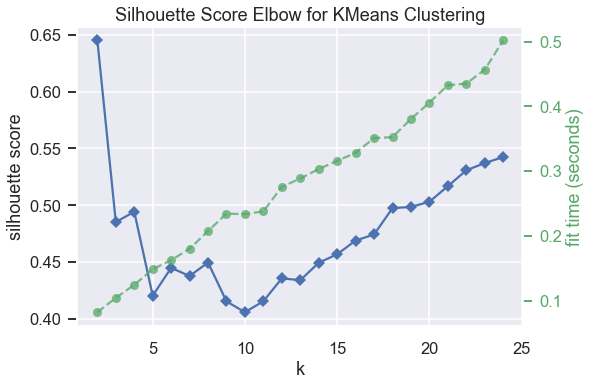

In [9]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,25), metric='silhouette', timings=True, locate_elbow=False, 
)
visualizer.fit(X)        
visualizer.show();

Let's build a k-means model with the optimal number of clusters

In [10]:
num_optimal_clusters = 10
optimal_km = KMeans(n_clusters=num_optimal_clusters)
optimal_clusters = optimal_km.fit_predict(X)

Plot a silhouette visualization

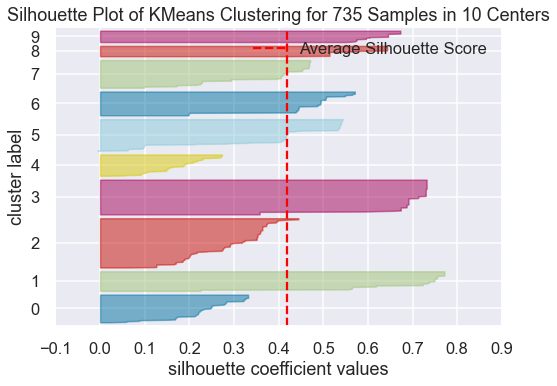

In [11]:
silhouette_visualizer(optimal_km, X, colors='yellowbrick');

Plot a manifold visualization of the clusters. Try some of the other manifold visualization methods. 


|Manifold|Description|
|--------|-----------|
|"lle"|`Locally Linear Embedding`|
|"ltsa"|LTSA LLE|
|"hessian"|Hessian LLE|
|"modified"|Modified LLE|
|"isomap"|Isomap|
|"mds"|Multi-Dimensional Scaling|
|"spectral"|Spectral Embedding|
|"tsne"|t-SNE|

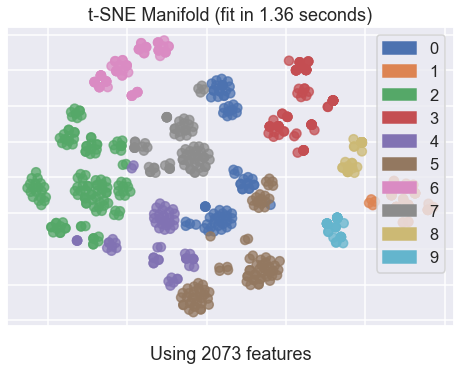

In [12]:
viz = Manifold(manifold="tsne",classes=list(range(0,max(optimal_clusters)+1)))
viz.fit_transform(X,optimal_clusters)
viz.show();